In [1]:
#loading dataset
import pandas as pd
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report,auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

### Importing the Dataset

In [2]:
df = pd.read_csv("Lumpy skin disease data.csv")
df.head()

,x,y,region,country,reportingDate,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
0,90.380931,22.437184,Asia,Bangladesh,10/9/2020,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,2,27970.983100,3691.746950,1
1,87.854975,22.986757,Asia,India,20/12/2019,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,2,25063.646690,671.326701,1
2,85.279935,23.610181,Asia,India,20/12/2019,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,2,6038.477155,1426.839831,1
3,81.564510,43.882221,Asia,China,25/10/2019,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,2,760.703340,0.000000,1
4,81.161057,43.834976,Asia,China,25/10/2019,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,270.367426,0.000000,1


In [3]:
df.describe()

,x,y,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
count,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000
mean,79.221374,46.370056,59.452159,9.107777,23.978048,0.803487,26.271137,-15.794755,-11.227807,-6.681212,3.728230,8.542482,164.769302,4.416119,629.129412,170.306057,0.122526
std,43.338530,19.220555,19.423029,2.988448,11.518315,1.172915,33.630747,17.587685,17.989715,18.540915,4.952353,6.205199,19.679197,2.406231,2279.198775,1127.977653,0.327898
min,-179.750000,-28.750000,0.000000,2.000000,0.000000,0.000000,0.000000,-52.100000,-48.100000,-44.200000,0.000000,0.000000,66.000000,0.000000,0.000000,0.000000,0.000000
25%,45.083150,34.750000,43.800000,6.800000,23.210000,0.000000,5.900000,-30.100000,-25.500000,-20.900000,0.400000,3.000000,152.000000,3.000000,2.513366,0.000000,0.000000
50%,80.750000,48.250000,62.300000,8.300000,31.000000,0.200000,14.700000,-19.100000,-14.200000,-9.700000,1.500000,8.020000,161.000000,4.000000,43.383823,0.000197,0.000000
75%,109.750000,61.750000,75.300000,11.100000,31.000000,1.100000,33.400000,-2.200000,1.400000,4.900000,4.800000,12.710000,176.000000,4.000000,386.124908,0.002094,0.000000
max,179.750000,81.750000,98.700000,20.600000,31.000000,7.500000,341.900000,23.900000,28.500000,36.400000,28.600000,30.920000,249.000000,11.000000,167388.672700,56654.780150,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24803 entries, 0 to 24802
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x                    24803 non-null  float64
 1   y                    24803 non-null  float64
 2   region               3039 non-null   object 
 3   country              3039 non-null   object 
 4   reportingDate        3039 non-null   object 
 5   cld                  24803 non-null  float64
 6   dtr                  24803 non-null  float64
 7   frs                  24803 non-null  float64
 8   pet                  24803 non-null  float64
 9   pre                  24803 non-null  float64
 10  tmn                  24803 non-null  float64
 11  tmp                  24803 non-null  float64
 12  tmx                  24803 non-null  float64
 13  vap                  24803 non-null  float64
 14  wet                  24803 non-null  float64
 15  elevation            24803 non-null 

In [5]:
df.isna().sum(axis=0)

x                          0
y                          0
region                 21764
country                21764
reportingDate          21764
cld                        0
dtr                        0
frs                        0
pet                        0
pre                        0
tmn                        0
tmp                        0
tmx                        0
vap                        0
wet                        0
elevation                  0
dominant_land_cover        0
X5_Ct_2010_Da              0
X5_Bf_2010_Da              0
lumpy                      0
dtype: int64

In [6]:
df.columns

Index(['x', 'y', 'region', 'country', 'reportingDate', 'cld', 'dtr', 'frs',
       'pet', 'pre', 'tmn', 'tmp', 'tmx', 'vap', 'wet', 'elevation',
       'dominant_land_cover', 'X5_Ct_2010_Da', 'X5_Bf_2010_Da', 'lumpy'],
      dtype='object')

### Dropping Unnecessary Columns

In [7]:
df.drop(columns=['region','country','reportingDate','X5_Ct_2010_Da','X5_Bf_2010_Da'],inplace=True)
df.head()

,x,y,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,lumpy
0,90.380931,22.437184,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,2,1
1,87.854975,22.986757,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,2,1
2,85.279935,23.610181,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,2,1
3,81.564510,43.882221,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,2,1
4,81.161057,43.834976,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,1


In [8]:
df.corr()

,x,y,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,lumpy
x,1.000000,0.387501,-0.187324,0.004775,0.370836,-0.358457,-0.478733,-0.594490,-0.580375,-0.563327,-0.424080,-0.164079,0.069367,-0.087905,-0.408407
y,0.387501,1.000000,0.375184,-0.508181,0.783018,-0.879845,-0.295240,-0.839350,-0.861948,-0.878246,-0.804888,0.392614,-0.247528,-0.022575,-0.146576
cld,-0.187324,0.375184,1.000000,-0.738746,0.295737,-0.406114,0.424070,-0.167758,-0.225039,-0.278082,-0.177241,0.749386,-0.262220,-0.116746,0.237754
dtr,0.004775,-0.508181,-0.738746,1.000000,-0.338221,0.503055,-0.235839,0.241513,0.318798,0.390182,0.252225,-0.611676,0.422791,0.126460,-0.216253
frs,0.370836,0.783018,0.295737,-0.338221,1.000000,-0.888834,-0.316535,-0.853125,-0.861009,-0.863749,-0.905936,0.217203,-0.011161,-0.056338,-0.172834
pet,-0.358457,-0.879845,-0.406114,0.503055,-0.888834,1.000000,0.195620,0.821891,0.844336,0.860752,0.845909,-0.330310,0.138186,0.103978,0.061748
pre,-0.478733,-0.295240,0.424070,-0.235839,-0.316535,0.195620,1.000000,0.406589,0.377515,0.347758,0.428686,0.507761,-0.073501,-0.147926,0.419686
tmn,-0.594490,-0.839350,-0.167758,0.241513,-0.853125,0.821891,0.406589,1.000000,0.996758,0.987715,0.855783,-0.122820,-0.022032,0.028129,0.308560
tmp,-0.580375,-0.861948,-0.225039,0.318798,-0.861009,0.844336,0.377515,0.996758,1.000000,0.997084,0.856606,-0.170648,0.013571,0.037915,0.283436
tmx,-0.563327,-0.878246,-0.278082,0.390182,-0.863749,0.860752,0.347758,0.987715,0.997084,1.000000,0.852449,-0.215101,0.047257,0.046958,0.258099


### Exploratory Data Analysis

Text(0.5, 1.0, 'Lumpiness class distribution')

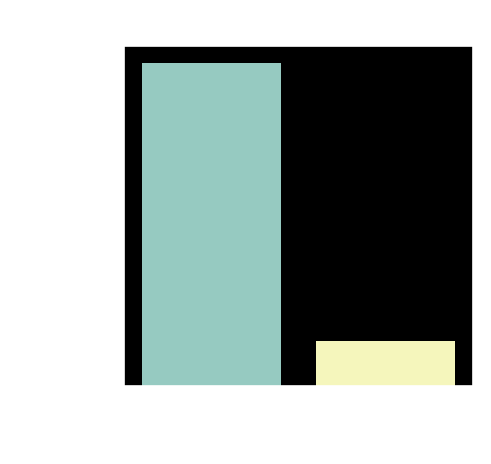

In [9]:
plt.figure(figsize=(3,3),dpi=150)
plt.style.use('dark_background')
sns.countplot(x='lumpy', data = df)
plt.xlabel('Lumpiness classes')
plt.ylabel('count of each class')
plt.title('Lumpiness class distribution')

Text(0.5, 1.0, 'Correlation Heatmap')

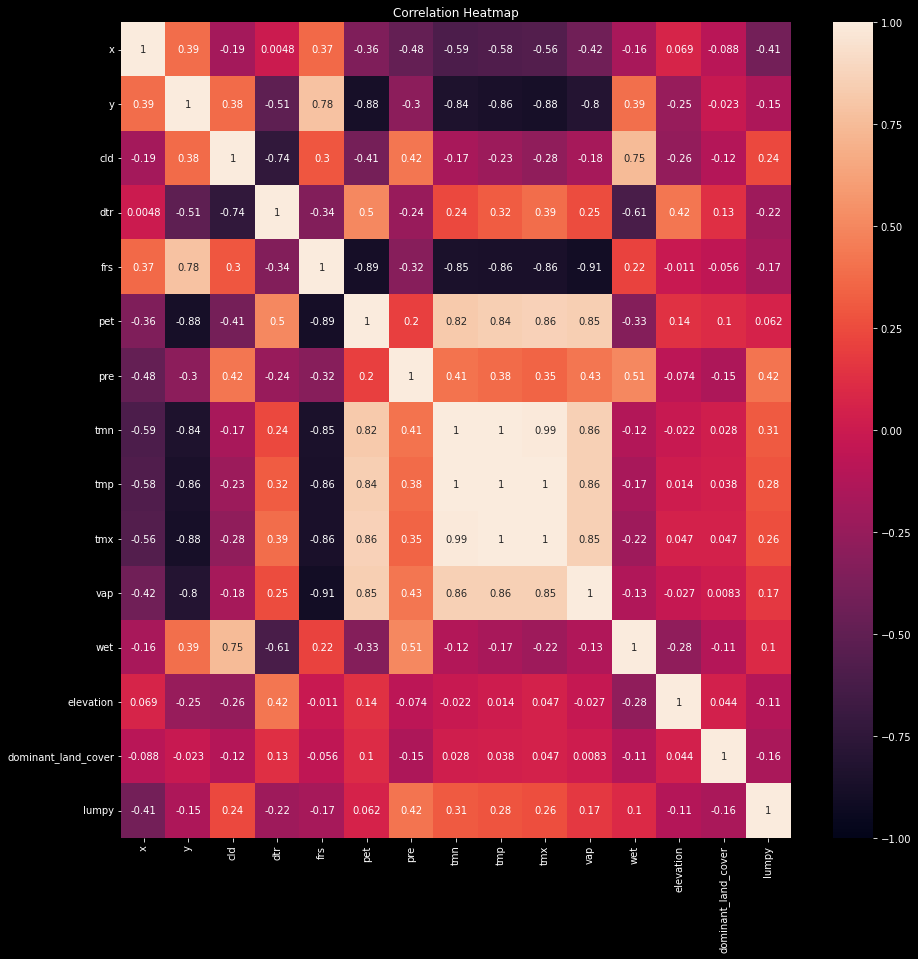

In [10]:
plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(df.corr(), vmin= -1, vmax = 1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12})

### Partitioning the dataset into training and test sets


In [11]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
print("//Independent features//")
print(X.head())
print("\n\n//Dependent feature//")
print(y.head())

//Independent features//
           x          y   cld   dtr  ...   vap   wet  elevation  dominant_land_cover
0  90.380931  22.437184  41.6  12.8  ...  15.7  0.00        147                    2
1  87.854975  22.986757  40.5  13.3  ...  16.3  0.00        145                    2
2  85.279935  23.610181  27.3  13.6  ...  13.0  0.98        158                    2
3  81.564510  43.882221  45.3  12.8  ...   0.9  4.64        178                    2
4  81.161057  43.834976  38.8  13.2  ...   1.2  1.69        185                    3

[5 rows x 14 columns]


//Dependent feature//
0    1
1    1
2    1
3    1
4    1
Name: lumpy, dtype: int64


### Train Test Split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

### Feature Scaling

In [13]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [14]:
# Logistic Regression
lr=LogisticRegression()
lr_mdl=lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)
lr_con_matrix=confusion_matrix(y_test,lr_pred)
lr_acc=accuracy_score(y_test,lr_pred)
print("Confusion Matrix",'\n',lr_con_matrix)
print('\n')
print("Accuracy of Logistic Regression: ",lr_acc*100,'\n')
print(classification_report(y_test,lr_pred))

Confusion Matrix 
 [[6366  150]
 [ 230  695]]


Accuracy of Logistic Regression:  94.89315952156969 

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      6516
           1       0.82      0.75      0.79       925

    accuracy                           0.95      7441
   macro avg       0.89      0.86      0.88      7441
weighted avg       0.95      0.95      0.95      7441



In [15]:
#Random Forest Classfier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
rf_con_matrix = confusion_matrix(y_test, rf_pred)
rf_acc = accuracy_score(y_test, rf_pred)
print("Confusion Matrix\n",rf_con_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc*100,'\n')
print(classification_report(y_test,rf_pred))

Confusion Matrix
 [[6406  110]
 [  80  845]]


Accuracy of Random Forest: 97.44657976078484 

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      6516
           1       0.88      0.91      0.90       925

    accuracy                           0.97      7441
   macro avg       0.94      0.95      0.94      7441
weighted avg       0.97      0.97      0.97      7441



In [16]:
#DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_con_matrix = confusion_matrix(y_test, dt_pred)
dt_acc = accuracy_score(y_test, dt_pred)
print("Confusion Matrix\n",dt_con_matrix)
print("\n")
print("Accuracy of Decision Tree Classifier:",dt_acc*100,'\n')
print(classification_report(y_test,dt_pred))

Confusion Matrix
 [[6387  129]
 [  78  847]]


Accuracy of Decision Tree Classifier: 97.21811584464454 

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      6516
           1       0.87      0.92      0.89       925

    accuracy                           0.97      7441
   macro avg       0.93      0.95      0.94      7441
weighted avg       0.97      0.97      0.97      7441



Text(0.5, 0, 'False Positive Rate')

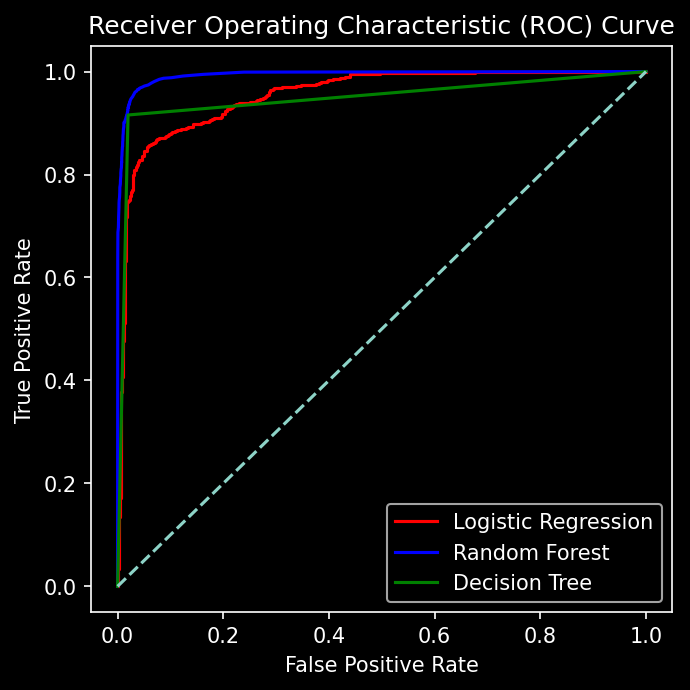

In [17]:
y_score1 = lr.predict_proba(X_test)[:,1]
y_score2 = rf.predict_proba(X_test)[:,1]
y_score3 = dt.predict_proba(X_test)[:,1]

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)

plt.figure(figsize=(5,5),dpi=150)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot(false_positive_rate1,true_positive_rate1, color='red', label = "Logistic Regression")
plt.plot(false_positive_rate2,true_positive_rate2, color='blue', label = "Random Forest")
plt.plot(false_positive_rate3,true_positive_rate3, color='green', label = "Decision Tree")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [18]:
mdl_evl = pd.DataFrame({'Model': ['Logistic Regression','Random Forest', 'Decision Tree'], 'Accuracy': [lr_acc*100,rf_acc*100,dt_acc*100]})
mdl_evl

,Model,Accuracy
0,Logistic Regression,94.893160
1,Random Forest,97.446580
2,Decision Tree,97.218116


Text(0, 0.5, 'Accuracy')

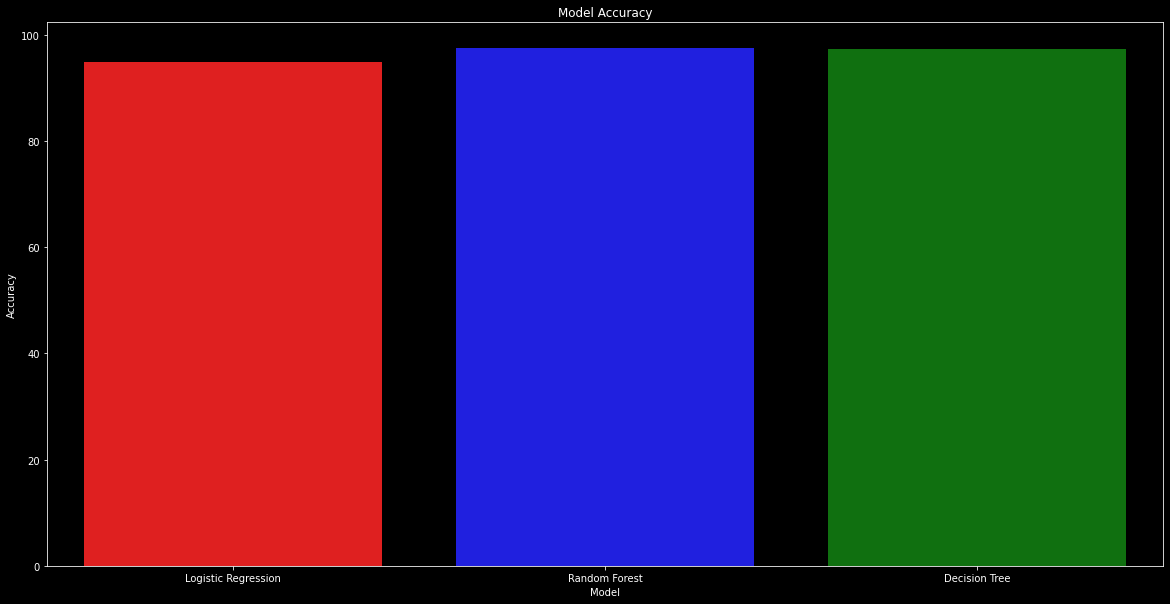

In [19]:
pal=['red','blue','green']
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x="Model",y="Accuracy",palette=pal,data=mdl_evl)
plt.title('Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')

So according to the accuracy scores the best model is Random Forest.